## Time series classification for earthquake prediction

The tactical purpose is to und data prep and setup for time series classification (TSC) on seismic (earthquake) dataset. Also to prototype the advanced pipeline (seq to feature-extract to tabular-transofrmer-gpt2-synthethic to interpretable anomaly-detection.

Note-1: Task-1 on Ridgecrest-2019 seq can be TSC for year-pre (class-0) vs year-post (class-1) the event . . . look how to define event, and how to define the time step (or not). Can average or max by-minute or by-hour, or could use tsfresh/tsflex feature extraction to no need to impose a regular time-step on the data . . . interesting research question to do both and compare, etc . . . 

In [10]:
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff 

In [7]:
data_train_raw = loadarff('../data_EQ_UCR/Earthquakes_TRAIN.arff')
df_train = pd.DataFrame(data_train_raw[0])

data_test_raw = loadarff('../data_EQ_UCR/Earthquakes_TEST.arff')
df_test = pd.DataFrame(data_test_raw[0])

print(df_train.shape, df_test.shape)
display(df_train.head(2))
display(df_test.head(2))

(322, 513) (139, 513)


,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att504,att505,att506,att507,att508,att509,att510,att511,att512,target
0,-0.518009,-0.518009,2.654211,-0.518009,-0.518009,-0.518009,-0.518009,1.456243,2.558373,-0.518009,...,-0.518009,-0.518009,-0.518009,-0.518009,-0.518009,-0.518009,-0.518009,1.465826,-0.518009,b'1'
1,1.943733,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,...,3.365590,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,b'0'


,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att504,att505,att506,att507,att508,att509,att510,att511,att512,target
0,-0.269272,-0.269272,-0.269272,-0.269272,-0.269272,3.136935,-0.269272,-0.269272,2.984190,-0.269272,...,-0.269272,-0.269272,-0.269272,-0.269272,-0.269272,-0.269272,-0.269272,-0.269272,-0.269272,b'0'
1,-0.468873,2.748038,1.626291,-0.468873,-0.468873,-0.468873,-0.468873,-0.468873,1.663373,-0.468873,...,1.617020,-0.468873,2.062011,-0.468873,-0.468873,-0.468873,-0.468873,1.635561,-0.468873,b'1'


In [8]:
df_train['target'].value_counts()

b'0'    264
b'1'     58
Name: target, dtype: int64

In [9]:
df_test['target'].value_counts()

b'0'    104
b'1'     35
Name: target, dtype: int64

data source: 

https://timeseriesclassification.com/description.php?Dataset=Earthquakes

The earthquake classification problem involves predicting whether a major event is about to occur based on the most recent readings in the surrounding area. The data is taken from Northern California Earthquake Data Center and each data is an averaged reading for one hour, with the first reading taken on Dec 1st 1967, the last in 2003. We transform this single time series into a classification problem by first defining a major event as any reading of over 5 on the Rictor scale. Major events are often followed by aftershocks. The physics of these are well understood and their detection is not the objective of this exercise. Hence we consider a positive case to be one where a major event is not preceded by another major event for at least 512 hours. To construct a negative case, we consider instances where there is a reading below 4 (to avoid blurring of the boundaries between major and non major events) that is preceded by at least 20 readings in the previous 512 hours that are non-zero (to avoid trivial negative cases). None of the cases overlap in time (i.e. we perform a segmentation rather than use a sliding window). Of the 86,066 hourly readings, we produce 368 negative cases and 93 positive.

Train Size: 322
Test Size: 139
Length: 512
Number of Classes: 2
Number of Dimensions: 1

Best Algorithm: RotF

Best Accuracy: 75.92%

PoC: A. Bagnall

Relevant Papers:

Bagnall, Anthony, Luke Davis, Jon Hills, and Jason Lines. "Transformation based ensembles for time series classification." In Proceedings of the 2012 SIAM international conference on data mining, pp. 307-318. Society for Industrial and Applied Mathematics, 2012.

Bagnall, Anthony, M. Flynn, J. Large, J. Line, A. Bostrom, and G. Cawley. "Is rotation forest the best classifier for problems with continuous features?." arXiv preprint arXiv:1809.06705 (2018).

Relevant Sites:

https://timeseriesclassification.com/description.php?Dataset=Earthquakes

https://timeseriesclassification.com/

https://github.com/sktime/sktime

https://pypi.org/project/sktime/

In [15]:
df = pd.concat([df_train, df_test])
df = df.reset_index(drop=True)
print(df.shape, df_train.shape, df_test.shape)
print(322 + 139)

display(df.head(3))
display(df.tail(3))

(461, 513) (322, 513) (139, 513)
461


,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att504,att505,att506,att507,att508,att509,att510,att511,att512,target
0,-0.518009,-0.518009,2.654211,-0.518009,-0.518009,-0.518009,-0.518009,1.456243,2.558373,-0.518009,...,-0.518009,-0.518009,-0.518009,-0.518009,-0.518009,-0.518009,-0.518009,1.465826,-0.518009,b'1'
1,1.943733,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,...,3.365590,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,b'0'
2,2.638517,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,...,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,b'0'


,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att504,att505,att506,att507,att508,att509,att510,att511,att512,target
458,1.852363,2.022497,-0.556382,-0.556382,-0.556382,1.431504,-0.556382,-0.556382,1.762819,-0.556382,...,-0.556382,-0.556382,-0.556382,-0.556382,-0.556382,-0.556382,-0.556382,-0.556382,-0.556382,b'1'
459,-0.448388,-0.448388,-0.448388,-0.448388,-0.448388,-0.448388,-0.448388,2.279107,-0.448388,-0.448388,...,-0.448388,-0.448388,-0.448388,-0.448388,-0.448388,-0.448388,-0.448388,1.983100,-0.448388,b'0'
460,-0.463868,1.604722,-0.463868,-0.463868,-0.463868,-0.463868,-0.463868,-0.463868,-0.463868,-0.463868,...,-0.463868,-0.463868,1.961375,-0.463868,-0.463868,2.552401,-0.463868,-0.463868,-0.463868,b'0'


In [17]:
df.columns

Index(['att1', 'att2', 'att3', 'att4', 'att5', 'att6', 'att7', 'att8', 'att9',
       'att10',
       ...
       'att504', 'att505', 'att506', 'att507', 'att508', 'att509', 'att510',
       'att511', 'att512', 'target'],
      dtype='object', length=513)

### Prepare Data for Feature Extraction

In [18]:
# separate target-label col from feature columns

df_y = df[['target']]
df_X = df.drop('target', axis=1)

print(df_X.shape, df_y.shape)

(461, 512) (461, 1)


In [19]:
df_X.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att503,att504,att505,att506,att507,att508,att509,att510,att511,att512
0,-0.518009,-0.518009,2.654211,-0.518009,-0.518009,-0.518009,-0.518009,1.456243,2.558373,-0.518009,...,-0.518009,-0.518009,-0.518009,-0.518009,-0.518009,-0.518009,-0.518009,-0.518009,1.465826,-0.518009
1,1.943733,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,...,2.457789,3.365590,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115
2,2.638517,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,...,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102
3,-0.531138,-0.531138,-0.531138,-0.531138,-0.531138,-0.531138,-0.531138,-0.531138,-0.531138,-0.531138,...,1.366900,-0.531138,2.147402,-0.531138,-0.531138,-0.531138,-0.531138,-0.531138,-0.531138,-0.531138
4,-0.593665,2.020105,1.174727,-0.593665,-0.593665,1.606043,1.217859,1.588790,-0.593665,-0.593665,...,1.226485,-0.593665,-0.593665,-0.593665,1.493901,-0.593665,-0.593665,-0.593665,1.899337,-0.593665


In [30]:
# df_X

In [27]:
# df_X = df_X.reset_index()

In [31]:
df_X_melt = pd.melt(df_X, 
                    id_vars=['index'],
                    value_vars=df_X.columns, 
                    var_name='step_cnt',
                    value_name = 'val'
                   )

In [33]:
df_X_melt

,index,step_cnt,val
0,0,att1,-0.518009
1,1,att1,1.943733
2,2,att1,2.638517
3,3,att1,-0.531138
4,4,att1,-0.593665
...,...,...,...
236027,456,att512,-0.553787
236028,457,att512,-0.559495
236029,458,att512,-0.556382
236030,459,att512,-0.448388


In [35]:
# df_X_melt['index'].value_counts()

### Viz Series

In [37]:
df_X_melt.head(2)

,index,step_cnt,val
0,0,att1,-0.518009
1,1,att1,1.943733


In [43]:
%matplotlib inline

import matplotlib.pyplot as plt

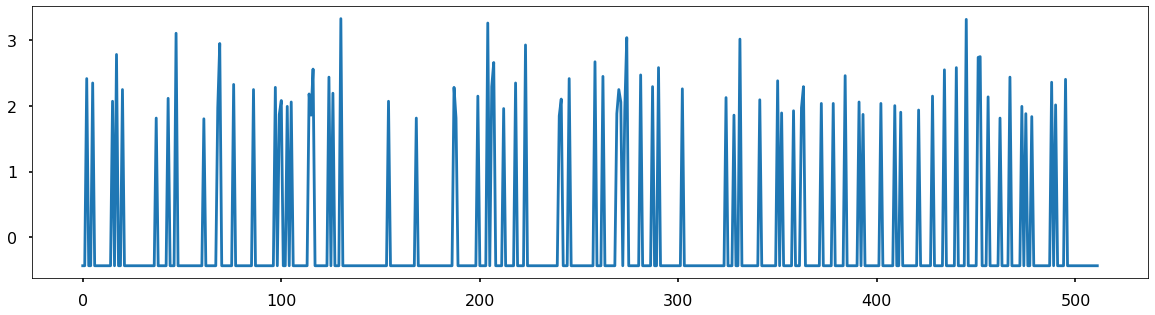

In [49]:
index_viz = 35

plt.figure(figsize=(20,5))
plt.style.use('seaborn-poster')
df_viz1 = df_X_melt[df_X_melt['index'] == index_viz]
df_viz1 = df_viz1.reset_index(drop=True)
df_viz1['val'].plot();

### Feature extraction from time series

In [50]:
from tsfresh import extract_features

ModuleNotFoundError: No module named 'tsfresh'